In [112]:
# https://www.vgchartz.com/charts/platform_totals/Hardware.php/
# AI_OO_김코딩_section1
#Name : 게임의 이름입니다.
#Platform : 게임이 지원되는 플랫폼의 이름입니다.
#Year : 게임이 출시된 연도입니다.
#Genre : 게임의 장르입니다.
#Publisher : 게임을 배급한 회사입니다.
#NA_Sales : 북미지역에서의 출고량입니다.
#EU_Sales : 유럽지역에서의 출고량입니다.
#JP_Sales : 일본지역에서의 출고량입니다.
#Other_Sales : 기타지역에서의 출고량입니다.

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vgames2.csv')
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
625,626,The Hobbit,GBA,2003.0,Platform,Vivendi Games,0.14M,0.05,0,0
2541,2542,Resident Evil Archives: Resident Evil,Wii,2008.0,Action,Capcom,0.17,0.04,0.08,0.02
14318,14319,Viva Pinata,X360,2006.0,Simulation,Microsoft Game Studios,0.45,960K,0.02,0.2
1993,1994,Batman: Arkham Origins,PS3,2013.0,Action,Warner Bros. Interactive Entertainment,1.07,0.87,0.04,0.4
11626,11627,Resident Evil: The Mercenaries 3D,3DS,2011.0,Action,Capcom,0.16,0.17,0.13,0.03


In [115]:
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [116]:
# 플랫폼이 다른, 게임이 있는지 확인
df['Name'].value_counts()

Need for Speed: Most Wanted            12
FIFA 14                                 9
Ratatouille                             9
Madden NFL 07                           9
LEGO Marvel Super Heroes                9
                                       ..
Saki: Achiga-Hen Portable               1
Shining Force Feather                   1
Model * Oshare Audition: Dream Girl     1
Twisted Metal 2                         1
Rainbow Islands: Revolution             1
Name: Name, Length: 11493, dtype: int64

In [117]:
df = df.drop(columns="Unnamed: 0")
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [118]:
 df[df.duplicated(subset = ['Name','Platform'],keep = False)].sort_values(by=['Name'])

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7346,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0,0.22
8717,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0,0.01,0,0
1318,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.8,0.01,0.15
2673,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,20K,0.23,0,0.05
12529,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1,0.17,0.02,0.1
13808,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0,0.06,0,0.02
8651,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0,0.48,0,0
15705,Sonic the Hedgehog,PS3,2006.0,Platform,Sega,0.41,0.07,0.04,0.66
8055,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [119]:
# "Year" int로 변경 및 20XX/19XX로 형태 변경하기

In [120]:
df.Year.unique()

array([2.008e+03, 2.009e+03, 2.010e+03, 2.005e+03, 2.011e+03, 2.007e+03,
       2.001e+03, 2.003e+03, 2.006e+03, 2.014e+03, 2.015e+03, 2.002e+03,
       1.997e+03, 2.013e+03, 1.996e+03, 2.004e+03, 2.000e+03,       nan,
       1.984e+03, 1.998e+03, 2.016e+03, 1.985e+03, 1.999e+03, 9.000e+00,
       9.700e+01, 1.995e+03, 1.993e+03, 2.012e+03, 1.987e+03, 1.982e+03,
       1.100e+01, 1.994e+03, 1.990e+03, 1.500e+01, 1.992e+03, 1.991e+03,
       1.983e+03, 1.988e+03, 1.981e+03, 3.000e+00, 1.989e+03, 9.600e+01,
       6.000e+00, 8.000e+00, 1.986e+03, 1.000e+00, 5.000e+00, 4.000e+00,
       1.000e+01, 9.800e+01, 7.000e+00, 1.600e+01, 8.600e+01, 1.400e+01,
       9.500e+01, 2.017e+03, 1.980e+03, 2.020e+03, 2.000e+00, 1.300e+01,
       0.000e+00, 1.200e+01, 9.400e+01])

In [121]:
df.Year=df.Year.fillna(value = 9999)
df.Year=df.Year.astype(int)

In [122]:
def y_format(x):
  if x > 99:
    y = x
  elif x < 50:
    y = 2000 + x
  else:
    y = 1900 + x
  return y

df["Year"]=df['Year'].apply(y_format).astype(int)

In [123]:
# year 수가 비이상적인 case를 9999 처리.
change_year = df[(df.Year >= 2017) & (df.Year<=2020)].index

def change():
  for i in change_year:
    if df.loc[i,"Year"] >=2017 and df.loc[i,"Year"]<=2020:
      df.loc[i,"Year"] = 9999

change()   

In [124]:
# Sales format 일치시키기
def s_format(x):
  if x.endswith('K'):
    y = float(x.replace('K',""))*0.001
  elif x.endswith('M'):
    y = float(x.replace('M',""))
  else:
    y = float(x)
  return round(y,2)

In [125]:
df["NA_Sales"]=df.NA_Sales.apply(s_format)
df["EU_Sales"]=df.EU_Sales.apply(s_format)
df["JP_Sales"]=df.JP_Sales.apply(s_format)
df["Other_Sales"]=df.Other_Sales.apply(s_format)

In [126]:
# Genre의 NaN값처리 
df['Genre'] = df.groupby('Name')['Genre'].ffill()
df['Genre'] = df.groupby('Name')['Genre'].bfill()


In [127]:
drop_genre = df[df.Genre.isnull()==True].index
df_cleaned = df.drop(drop_genre,axis='index')


In [128]:
df_cleaned.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher      58
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [129]:
# Publisher 결측치 처리: drop
#df_cleaned[df_cleaned.Publisher.isnull()==True]

In [130]:
drop_publisher = df_cleaned[df_cleaned.Publisher.isnull()==True].index
df_cleaned2 = df_cleaned.drop(drop_publisher,axis='index')

In [131]:
df_cleaned2.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [132]:
# 중복값 확인 및 처리리
df2 = df_cleaned2.drop_duplicates(subset = ['Name','Platform','Year'],keep = 'first')

In [133]:
# 이상치확인
df2.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16508.000000,16508.000000,16508.000000,16508.000000,16508.000000
mean,2128.413133,0.264725,0.146550,0.077372,0.048000
std,979.989153,0.817561,0.504959,0.307049,0.188382
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,9999.000000,41.490000,29.020000,10.220000,10.570000


In [134]:
# 인덱스 재설정
df2.reset_index(drop=True,inplace=True)

In [135]:
df2.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16503,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16504,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16505,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16506,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03
16507,The King of Fighters '95,PS,1996,Fighting,Sony Computer Entertainment,0.00,0.00,0.16,0.01


In [136]:
## Global Column추가
df2["Global"] = df2[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum(axis=1)

<ipython-input-136-044ba37e352a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Global"] = df2[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum(axis=1)


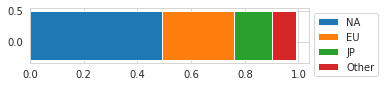

In [137]:
na = round(df2.NA_Sales.sum()/df2.Global.sum(),2)
eu = round(df2.EU_Sales.sum()/df2.Global.sum(),2)
jp = round(df2.JP_Sales.sum()/df2.Global.sum(),2)
other = round(df2.Other_Sales.sum()/df2.Global.sum(),2)

fig = plt.figure(figsize=(5,1))
plt.barh(0.1,na)
plt.barh(0.1,eu,left=na)
plt.barh(0.1,jp,left=na+eu)
plt.barh(0.1,other,left=na+eu+jp)

labels = ["NA","EU","JP","Other"]
plt.legend(labels = labels, loc=2, bbox_to_anchor=(1,1))
plt.show()

In [138]:
top10_sales = df2.nlargest(10,'Global')
top10_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global
2896,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4178,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12513,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3338,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7791,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1201,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6903,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3001,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16441,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10436,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [139]:
na_top10 = df2.nlargest(10,'NA_Sales')
na_top10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global
2896,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4178,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
10436,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1201,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
12513,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3338,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4321,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16441,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
3001,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
13042,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.62


In [140]:
other_top10 = df2.nlargest(10,'Other_Sales')
other_top10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global
14590,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
2896,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
14586,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.65
3467,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
12513,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3338,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
8173,Pro Evolution Soccer 2008,PS2,2007,Sports,Konami Digital Entertainment,0.05,0.00,0.64,2.93,3.62
6903,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3001,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
11082,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.75


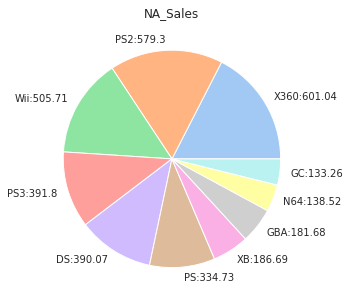

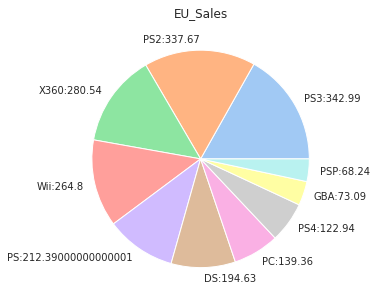

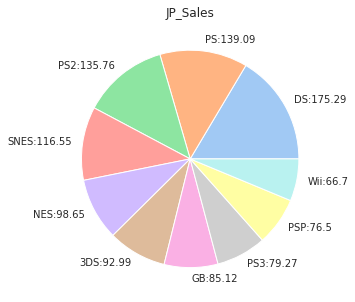

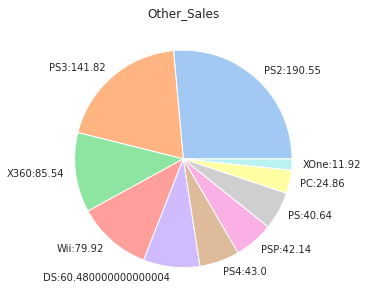

In [141]:
# 지역별 
cols = ["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]

for col in cols:
  sales_platform = df2.groupby('Platform')[col].sum()
  top_platforms = sales_platform.sort_values(ascending=False)[:10]
  labels =[f"{index}:{value}" for index, value in zip(top_platforms.index,top_platforms)]
  fig = plt.figure(figsize=(5,5))
  fig.set_facecolor('white')
  colors = sns.color_palette('pastel')[0:10]
  ax = fig.add_subplot

  plt.pie(list(top_platforms),labels=labels,colors=colors)
  plt.title(col)
  plt.show()

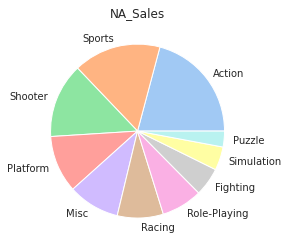

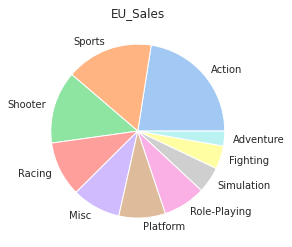

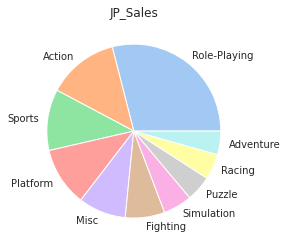

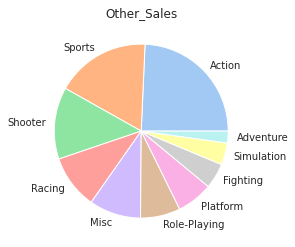

In [142]:
# 지역별 선호 장르르
cols2 = ["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]

for i,col2 in enumerate(cols2):
  sales_genre = df2.groupby('Genre')[col2].sum()
  top_genre = sales_genre.sort_values(ascending=False)[:10]
  #labels =[f"{index}:{value}" for index, value in zip(top_genre.index,top_genre)]
  genre_size = top_genre.values
  labels = top_genre.index
  #ax = plt.subplots(i//2+1,i%2+1)
  #fig,ax = plt.subplots(x=i,y=1,figsize=(5,5))
  fig.set_facecolor('white')
  colors = sns.color_palette('pastel')[0:10]
  #ax = plt.subplots(ncols=2)

  plt.pie(list(top_genre.values),labels=labels,colors=colors)
  plt.title(col2)
  plt.show()

In [143]:
df2.Year[df2.Year > 2015].value_counts()

2016    342
9999    252
Name: Year, dtype: int64

<ipython-input-144-a53030ccb851>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["year_bins"] = pd.cut(df2["Year"], bins, right = False,labels=bins_label[:-1])


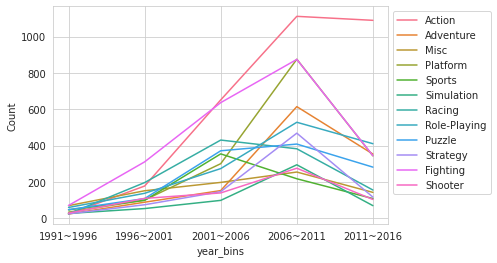

In [144]:
#연도별 출시율(장르)
bins = list(range(1991,2017,5))
bins_label = [str(x) + "~" + str(x+5) for x in bins]
df2["year_bins"] = pd.cut(df2["Year"], bins, right = False,labels=bins_label[:-1])

# genre_count = df2.Genre.value_counts()

genre_counts = df2.groupby(['Genre','year_bins']).size().reset_index(name='Count')
#genre_label = df2.groupby('Genre').unique()
sns.set_style('whitegrid')

sns.lineplot(data=genre_counts,x='year_bins',y='Count',hue='Genre',legend=False)
plt.legend(labels = df2.Genre.unique(), loc=2, bbox_to_anchor=(1,1))
plt.show()

<ipython-input-145-be9d92a0845e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["year_bins"] = pd.cut(df2["Year"], bins, right = False,labels=bins_label[:-1])


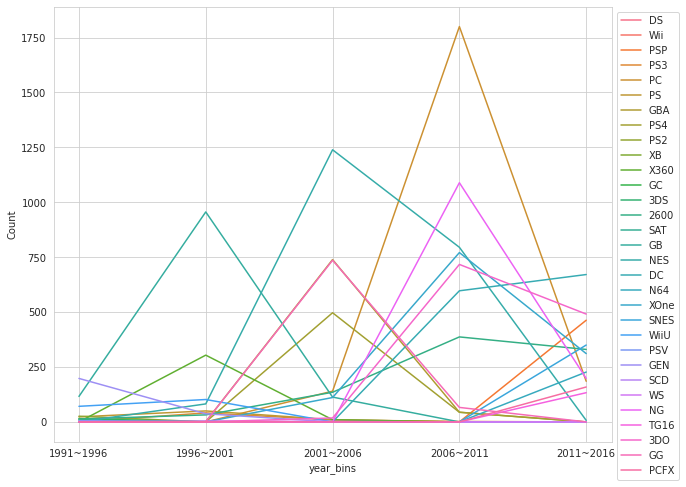

In [145]:
#연도별 출시율(플랫폼))
bins = list(range(1991,2017,5))
bins_label = [str(x) + "~" + str(x+5) for x in bins]
df2["year_bins"] = pd.cut(df2["Year"], bins, right = False,labels=bins_label[:-1])

# genre_count = df2.Genre.value_counts()

platform_counts = df2.groupby(['Platform','year_bins']).size().reset_index(name='Count')
#genre_label = df2.groupby('Genre').unique()
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')

sns.lineplot(data=platform_counts,x='year_bins',y='Count',hue='Platform',legend=False)
plt.legend(labels = df2.Platform.unique(), loc=2, bbox_to_anchor=(1,1))
plt.show()

In [146]:
# 인기있는 게임
# 

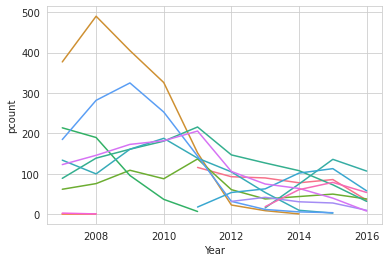

In [147]:
# 최근 10년간의 platform(2007~2016)
platform = df2[(df2.Year>=2007) & (df2.Year<=2016)].groupby(['Platform','Year']).size().reset_index(name='pcount')

sns.set_style('whitegrid')

sns.lineplot(data=platform,x='Year',y='pcount',hue='Platform',legend=False)
#plt.legend(labels = df2.Platform.unique(), loc=2, bbox_to_anchor=(1,1))
plt.show()

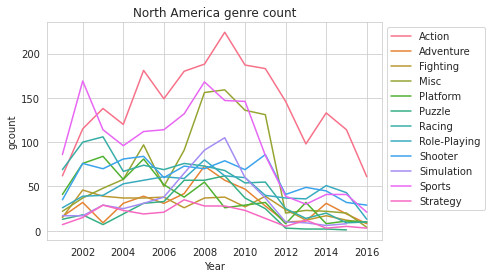

In [159]:
# 북아메리카의 장르별 인기 추이
na_genre = df2[(df2.NA_Sales > 0) & (df2.Year < 2020) & (df2.Year > 2000)].groupby(["Genre","Year"]).size().reset_index(name='gcount')
sns.lineplot(data=na_genre,x='Year',y='gcount',hue='Genre',legend=False)
plt.legend(labels = na_genre.Genre.unique(), loc=2, bbox_to_anchor=(1,1))
plt.title('North America genre count')
plt.show()

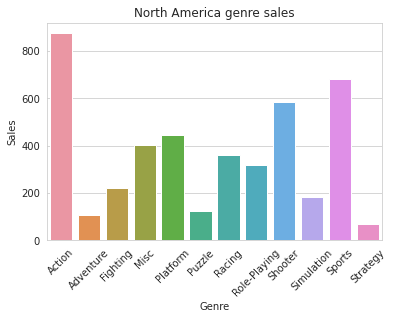

In [157]:
na_sales = df2[(df2.NA_Sales > 0)].groupby("Genre")["NA_Sales"].sum()
sns.barplot(x=na_sales.index,y=na_sales.values)
#plt.legend(labels = na_genre.index, loc=2, bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.ylabel('Sales')
plt.title('North America genre sales')
plt.show()

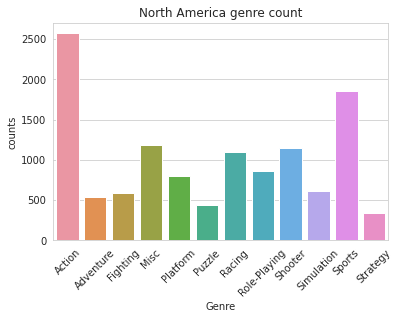

In [156]:
na_ = df2[(df2.NA_Sales > 0)].groupby("Genre").size().reset_index(name='counts')
sns.barplot(x=na_.Genre,y=na_.counts)
#plt.legend(labels = na_genre.index, loc=2, bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.title('North America genre count')
plt.show()

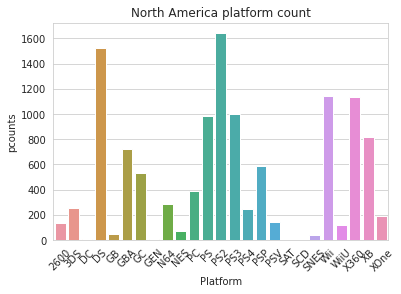

In [161]:
na_1 = df2[(df2.NA_Sales > 0)].groupby("Platform").size().reset_index(name='pcounts')
sns.barplot(x=na_1.Platform,y=na_1.pcounts)
plt.xticks(rotation=45)
plt.title('North America platform count')
plt.show()